In [235]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import datetime
yf.pdr_override() 
#  fix_yahoo_finance 모듈에서 해당함수를 호출하면 
# 야후에서 데이터를 획득하는 방식이 크롤링으로 변경되어 주가 데이터를 불러올 수 있게 하기 위함.

import warnings
warnings.filterwarnings("ignore")

In [236]:
start = '2000-01-04'
end = '2022-01-01'
idx = pd.date_range(start, end)

kospi = pdr.get_data_yahoo("^KS11", start = start, end = end)
snp = pdr.get_data_yahoo("^GSPC", start = start, end = end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [237]:
kospi_close = kospi["Close"]
snp_close = snp["Close"]

In [238]:
for i in idx:
    if i not in kospi_close:
        kospi_close[i] = kospi_close[i - datetime.timedelta(days=1)]
    if i not in snp_close:
        snp_close[i] = snp_close[i - datetime.timedelta(days=1)]

kospi_close = kospi_close.sort_index()
snp_close = snp_close.sort_index()

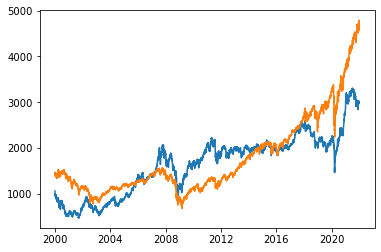

In [239]:
plt.plot(kospi_close.index, kospi_close.values);
plt.plot(snp_close.index, snp_close.values);

In [240]:
one   = 0 #"UP&UP"
two   = 0 #"UP&DOWN"
three = 0 #"DOWN&UP"
four  = 0 #"DOWN&DOWN"
for i in range(len(idx)-1):
    if snp_close[i] > snp_close[i+1]:
        if kospi_close[i] > kospi_close[i+1]:
            one += 1
    if snp_close[i] > snp_close[i+1]:
        if kospi_close[i] < kospi_close[i+1]:
            two += 1
    if snp_close[i] < snp_close[i+1]:
        if kospi_close[i] > kospi_close[i+1]:
            three += 1
    if snp_close[i] < snp_close[i+1]:
        if kospi_close[i] < kospi_close[i+1]:
            four += 1
#             print(f"{idx[i]}에 {round((snp_close[i] / snp_close[i+1]-1)*100,2)}%만큼 S&P500이 감소함")
#             print(f"{idx[i+1]}에 {round((kospi_close[i+1] / kospi_close[i+2]-1)*100,2)}%만큼 KOSPI가 감소함")
            
print("같은 방향 :", one + four)
print("다른 방향 :", two + three)

같은 방향 : 2537
다른 방향 : 1638
